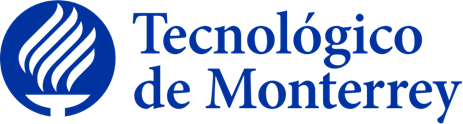

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Visión computacional para imágenes y video - TC4033.10**
### Prof: Dr. Gilberto Ochoa Ruiz

## **7.2 Google Colab algoritmos de extracción de características**
## **Harris Edge & Corner Detection**
### Febrero 24 de 2024

Los ejercicios que deben agregarse a este proyecto serán los siguientes:

 a) En el Collab de Harris Detector, se sugiere que se hagan pruebas con imágenes propias que el equipo decida usar. La idea  es escoger un objeto y tomar fotos con diferentes tipos de iluminación (bajo el sol, en un lugar oscuro) y bajo diferentes ángulos para analizar el comportamiento del detector de Harris bajo diferentes settings


## **Nombres y matrículas de los integrantes del Equipo 24:**

* Victor Alejandro Regueira Romero | A01794404
* Fernando Maytorena Espinosa de los Monteros | A01110946
* Edgar Rodolfo Escobar Gómez | A01793900
* Jonathan Garza Bennet | A01793038
* Rafael José Mateo Comprés | A01793054

Nota: Nuestro código de la actividad se encuentra al final, después del código de ejemplo suministrado por el profesor.

# 7. Harris Edge & Corner Detection

## Table of Contents
1. [Libraries](#libraries)
2. [Color image to Grayscale conversion](#grayscale)
3. [Spatial derivative calculation](#spatial)
4. [Structure tensor setup](#tensor)
5. [Harris response calculation](#response)
6. [Find edges and corners using R](#find)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage import convolve

#Equipo 24
import urllib.request

## 1. Color to Grayscale <a class="anchor" id="grayscale" ></a>

In [ ]:
#Función que descarga una imágen por medio de una URL y le asigna y entrega el nombre image.jpg
def download_image(url):
    # Construye un nombre de archivo basado en la URL (podrías querer personalizar esto)
    file_name = "image.jpg"
    # Descarga la imagen
    urllib.request.urlretrieve(url, file_name)
    return file_name

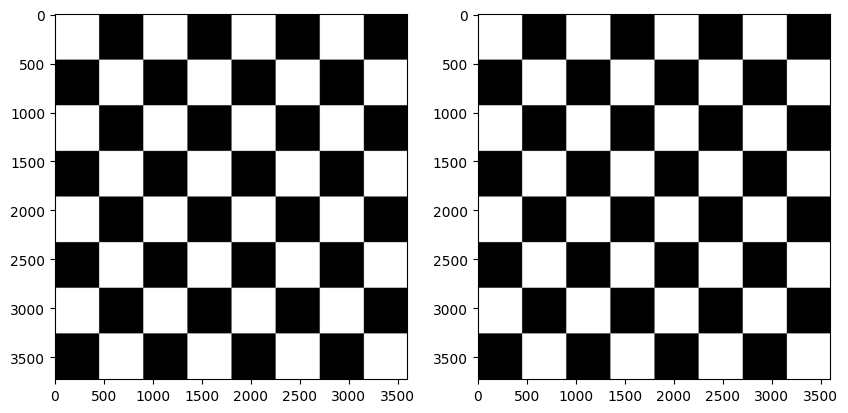

In [ ]:
CHESSBOARD = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data72/chessboard.jpg'
CUP = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data72/labeuro1.jpg'

image_path = download_image(CHESSBOARD)
#From: https://stackoverflow.com/questions/72456644/what-is-the-meaning-of-flag-in-cv2-imdecode:
#1 specifies cv2.IMREAD_COLOR : Reads image in BGR color format and removes the alpha channel .It is the default value of flag.
#0 specifies cv2.IMREAD_GRAYSCALE : Reads image in grayscale.
#-1 specifies cv2.IMREAD_UNCHANGED : Reads image without change, preserves the alpha channel
img = cv2.imread(image_path)
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")
plt.show()

## 2. Spatial derivative calculation <a class="anchor" id="spatial" ></a>

In [ ]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(img_gray)
I_y = gradient_y(img_gray)

## 3. Structure tensor setup <a class="anchor" id="tensor" ></a>

In [ ]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


Ixx = convolve(I_x**2, gaussian_kernel(3, 1))
Ixy = convolve(I_y*I_x, gaussian_kernel(3, 1))
Iyy = convolve(I_y**2, gaussian_kernel(3, 1))

## 4. Harris response calculation <a class="anchor" id="response" ></a>

In [ ]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2

# trace
traceA = Ixx + Iyy

harris_response = detA - k * traceA ** 2

In [ ]:
img_gray.shape

(3723, 3595)

In [ ]:
window_size = 3
offset = window_size//2
width, height = img_gray.shape

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

In [ ]:
#Find determinant and trace, use to get corner response
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

## 5. Find edges and corners using R <a class="anchor" id="find" ></a>

In [ ]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

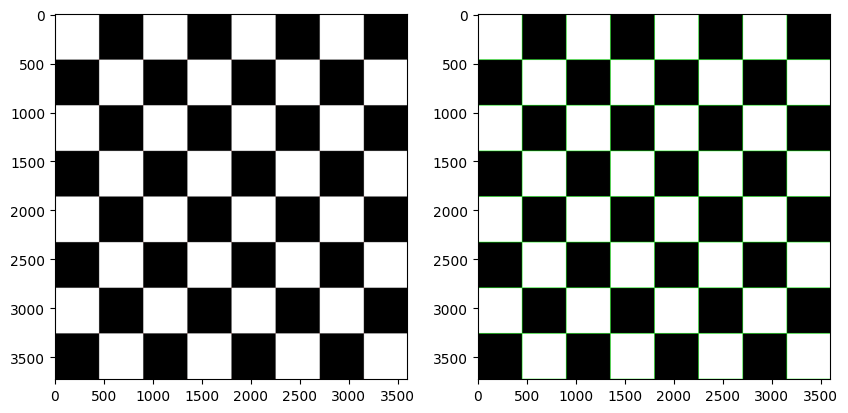

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")
plt.show()

#Actividad

## a) Análisis del comportamiento del detector de Harris bajo diferentes settings

**a) En el Collab de Harris Detector, se sugiere que se hagan pruebas con imágenes propias que el equipo decida usar. La idea  es escoger un objeto y tomar fotos con diferentes tipos de iluminación (bajo el sol, en un lugar oscuro) y bajo diferentes ángulos para analizar el comportamiento del detector de Harris bajo diferentes settings**


In [ ]:
#Se importa módulo io de skimage
from skimage import io

In [ ]:
#URLs de imágenes a analizar
DARK_MUG = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data72/labeuro2.jpg'
ILLUMINATED_MUG = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data72/labeuro3.jpg'
NORMAL_MUG = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data72/labeuro1.jpg'

In [ ]:
#Se crea lista de URLs
url_list = [NORMAL_MUG, DARK_MUG, ILLUMINATED_MUG]

In [ ]:
#Se leen las imágenes por de CV2 en escala de grises y se asignan a nuevas variables
img_normal = cv2.cvtColor(io.imread(NORMAL_MUG), cv2.COLOR_BGR2GRAY)
img_dark = cv2.cvtColor(io.imread(DARK_MUG), cv2.COLOR_BGR2GRAY)
img_illum = cv2.cvtColor(io.imread(ILLUMINATED_MUG), cv2.COLOR_BGR2GRAY)

In [ ]:
img_normal.shape

(1600, 1200)

In [ ]:
#Lista de las imágenes a analizar
img_list = [img_normal, img_dark, img_illum]

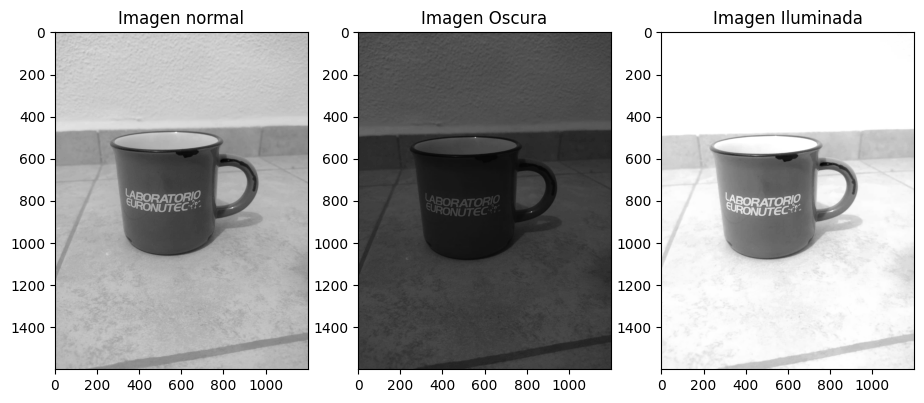

In [ ]:
#Se visualizan las imágenes a analizar
plt.figure(figsize=(15,8))

#Lista de títulos de imágen
titulos = ['Imagen normal', 'Imagen Oscura', 'Imagen Iluminada']

#Imprimir todas las imágenes con sus encabezados
for i in range(len(url_list)):
  plt.subplot(1,4,i+1)
  plt.imshow(img_list[i], cmap='gray')
  plt.title(titulos[i])

Se tienen tres imágenes de una taza en la misma escala con diferentes grados de iluminación, las cuáles el algoritmo detector de esquinas y bordes de Harris, debe de ser capaz de procesar de forma similar sin importar la cantidad de brillo.

A continuación, se crean nuevas funciones para el cálculo de los gradientes en dirección X y Y, utilizando kernels Sobel. De forma similar, se crea una función para la creación de un filtro Gaussiano, todos basados en las funciones implementadas en las secciones de código previo. Por último, se crea una función que calcula los gradientes, sus cuadrados y el producto de las derivadas en ambas direcciones, para luego aplicar el filtro Gaussiano en todas con el objetivo de calcular Ixx, Ixy e Iyy en un sólo paso.

In [ ]:
#Función que calcula el gradiente en dirección X empleando un kernel Sobel
def gradient_x(imggray):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    gradientx = sig.convolve2d(imggray, kernel_x, mode='same')
    return gradientx

#Función que calcula el gradiente en dirección Y empleando un kernel Sobel
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gradienty = sig.convolve2d(imggray, kernel_y, mode='same')
    return gradienty

#Función que crea un filtro Gaussiano de tamaño y sigma variable
def gaussian_kernel(size=3, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    gauss =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return gauss

#Función para el cálculo de Ixx, Ixy e Iyy, por medio de los gradientes en X y Y y la aplicación de un filtro Gaussiano
def gradient_gaussian(imggray, size=3, sigma = 1):

  Ixx = convolve(gradient_x(imggray)**2, gaussian_kernel(size, sigma))
  Ixy = convolve(gradient_y(imggray)*gradient_x(imggray), gaussian_kernel(size, sigma))
  Iyy = convolve(gradient_y(imggray)**2, gaussian_kernel(size, sigma))

  return Ixx, Ixy, Iyy

In [ ]:
#Se imprimen la forma de las imágenes para verificar que las dimensiones originales se mantengan
print(gradient_x(img_normal).shape)
print(gradient_x(img_dark).shape)
print(gradient_x(img_illum).shape)

(1600, 1200)
(1600, 1200)
(1600, 1200)


In [ ]:
k = 0.05 #Valor de Alpha para el algoritmo de Harris

#Se aplica la función previamente definida y se obtienen los valore Ixx, Ixy e
#Iyy valores definidos de tamaño y sigma en el filtro Gaussiano
matrix = gradient_gaussian(img_normal, 3, 1)

#El Determinante se puede calcular por medio de los elementos resultantes de la
#función anterior
#detA = Ixx * Iyy - Ixy ** 2
detA = matrix[0] * matrix[2] - matrix[1]**2

#De igual forma la traza
#traceA = Ixx + Iyy
traceA = matrix[0] + matrix[2]

#Por útlimo se calcula la respuesta de Harris
harris_response = detA - k * traceA ** 2

In [ ]:
#Ixx, Ixy, Iyy = gradient_gaussian(img_normal, 3, 1)

### A continuación se muestra una explicación de cómo la ventana se desliza a través de toda la imágen

In [ ]:
#Tamaño de la ventana
window_size = 3

#Cálculo del offset para deslizar la ventana a partir de su tamaño
offset = window_size//2
#width, height = img_front.shape # Error

#Se obtiene la altura y al ancho a partir de la forma de la imágen
height, width = img_normal.shape

"""for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])"""

'for y in range(offset, height-offset):\n    for x in range(offset, width-offset):\n        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])\n        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])\n        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])'

In [ ]:

#Ejemplo de una ventana dezlizante aplicando el algoritmo de Harris
#lasty = height-offset-1
#lastx = width-offset-1

# last y and x are always substracted by 1 (and Offset)
# in the first part of the slicing you would get the offset substracted again, assuming last real y is 5000, the range gets until 4999 substracting the offset
# twice ensures being at 4997, the last window would get until 4997 leaving 3 pixels from the starting point until the real end (the size of the window).

# likewise the last part of the slicing should get until the real y end (5000), so we would need the slicing to reach until 5001 (5000 + 1).
# to achieve this the extend the last y in the range (4999) adding one offset (5000) plus the 1 needed to end in 5001

#Sxx = np.sum(Ixx[lasty-offset:lasty+1+offset, lastx-offset:lastx+1+offset])
#Syy = np.sum(Iyy[lasty-offset:lasty+1+offset, lastx-offset:lastx+1+offset])
#Sxy = np.sum(Ixy[lasty-offset:lasty+1+offset, lastx-offset:lastx+1+offset])

In [ ]:
#Se encuentra el determinante y traza para contrar bordes o esquinas.
#det = (Sxx * Syy) - (Sxy**2)
#trace = Sxx + Syy
#r = det - k*(trace**2)

### Encontrando Esquinas y Bordes Empleando R

In [ ]:
#Se crean copias de la imagen para realizar las operaciones
img_copy_for_corners = np.copy(io.imread(NORMAL_MUG))
img_copy_for_edges = np.copy(io.imread(NORMAL_MUG))

#Se clasifican bordes y esquinas dependiendo del valor de R en cada punto
for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # Esquina, se convierte el pixel a rojo
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # Borde, se convierte el pixel a verde
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

In [ ]:
#Se despliegan los resultados
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.title('Esquinas')
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")
plt.title('Bordes')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

A continuación, se crea una función que aplica todo el algoritmo de Harris en una sola operación, devolviendo los bordes y esquinas encontrados en una imágen.

In [ ]:
#Función que aplica el algoritmo
def analisis(imgoriginal, kernelgaussian=3, sigmagaussian=1, kvalue=0.05):

  #Transformar imagen a escala de grises
  img_gray = cv2.cvtColor(imgoriginal, cv2.COLOR_BGR2GRAY)

  #Se obtienen los valores de Ixx, Ixy e Iyy
  matrix = gradient_gaussian(img_gray, kernelgaussian, sigmagaussian)

  #Se calcula determinante y traza
  det = matrix[0] * matrix[2] - matrix[1]**2                          # determinant:  detA = Ixx * Iyy - Ixy ** 2
  trace = matrix[0] + matrix[2]                                       # trace :       traceA = Ixx + Iyy

  #Calcular respuesta de Harris
  harris_response = det - kvalue * trace ** 2

  #Copias para las operaciones de detección
  img_copy_for_corners = np.copy(imgoriginal)
  img_copy_for_edges = np.copy(imgoriginal)

  #Se encuentran todos los bordes y esquinas
  for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            #Esquina, se convierte el pixel a rojo
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            #Borde, se convierte el pixel a verde
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

  return img_copy_for_corners, img_copy_for_edges

Se pudo observar que el resultado anterior se encontraron una cantidad de bordes como de esquinas muy elevado. Lo anterior se debe tanto al valor de sigma como de k. En el siguiente ejemplo, se aplicará el algoritmo de detección, pero con un un filtro Gaussiano de mayor tamaño con el objetivo de capturar menos detalles en todas las imágenes y comparar los resultados de forma visual.

In [ ]:
img_normal = io.imread(NORMAL_MUG)
img_dark = io.imread(DARK_MUG)
img_illum = io.imread(ILLUMINATED_MUG)

#Lista con todas las imágenes a analizar
img_color_list = [img_normal, img_dark, img_illum]

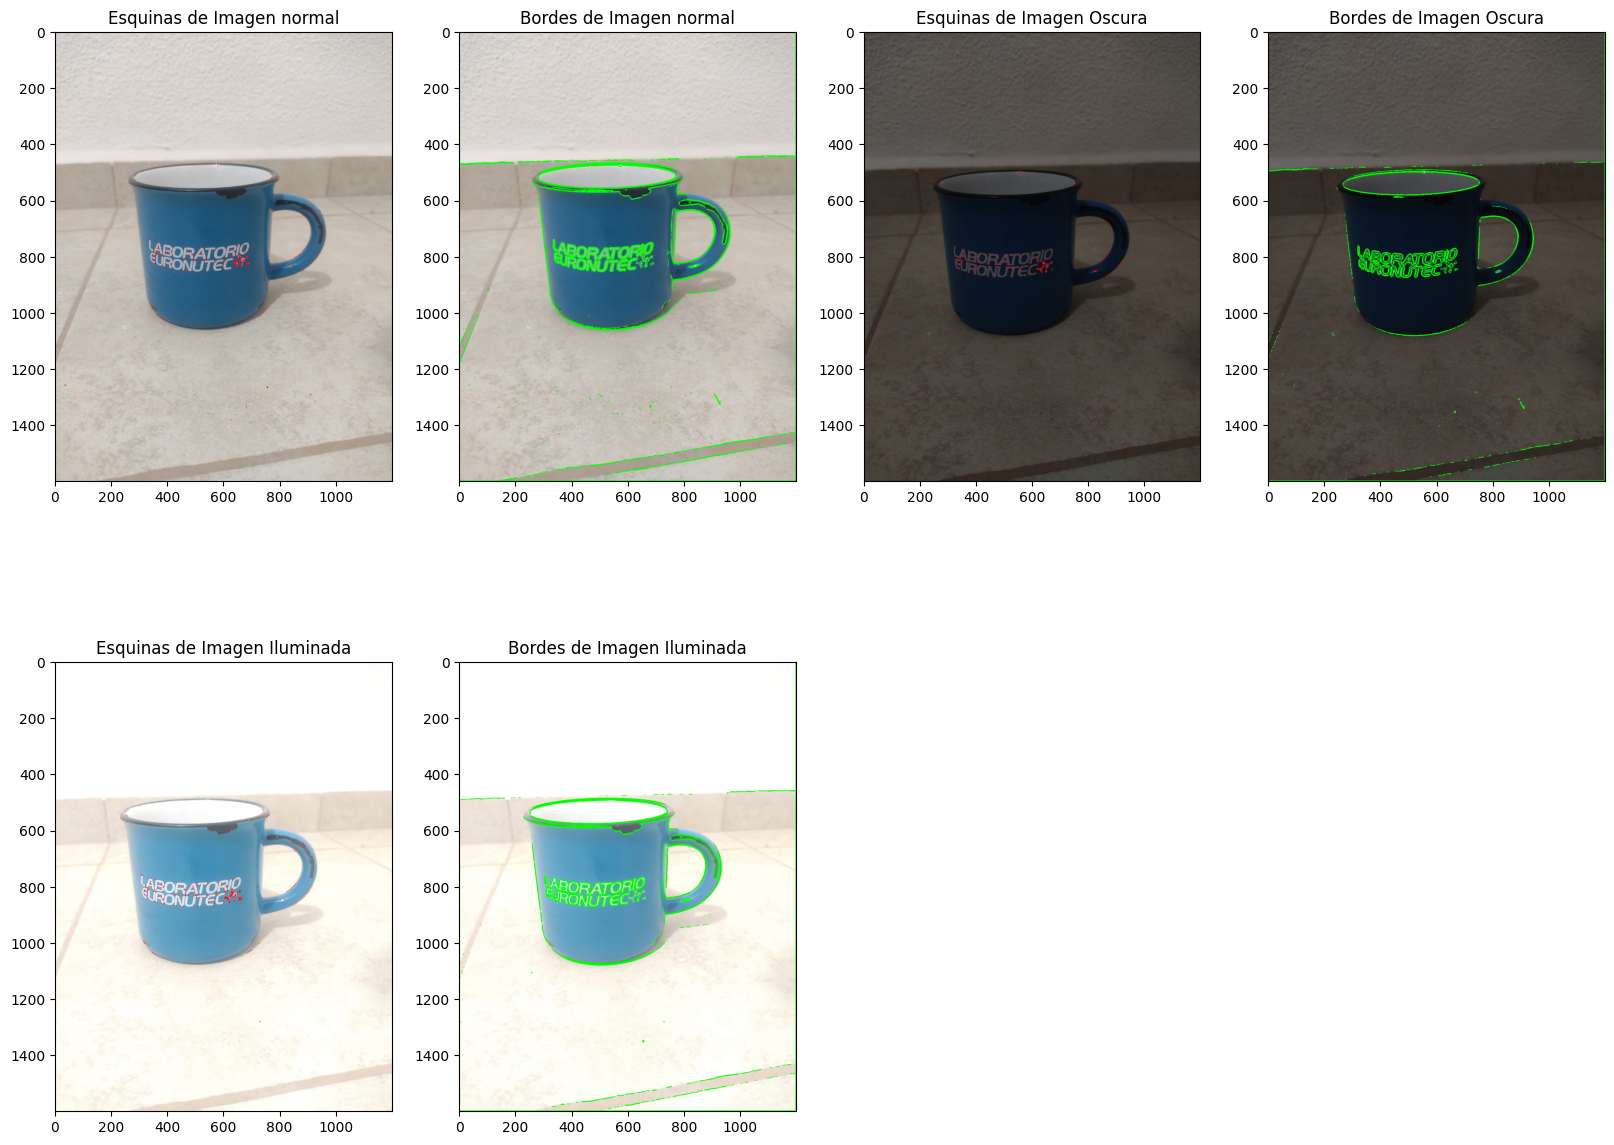

In [ ]:
#Se define el tamaño de la gráfica
plt.figure(figsize=(20,15))

#Se inicializa el contador
contador = 0

#Se aplica el algoritmo de detección y se despliegan los resultados
for i in range(len(img_color_list)):
  img_corners, img_edges = analisis(img_color_list[i], 3, 50, 0.05)



  j = i + 1 + contador
  k = i + 2 + contador

  contador += 1

  # j,k = 1,2
  # j,k = 2,3
  # j,k = 3,4

  #j,k = 1,2      0
  #j,k = 3,4      1
  #j,k = 5,6      2

  plt.subplot(2, 4, j)
  plt.imshow(img_corners, cmap="gray")
  plt.title('Esquinas de '+titulos[i])

  plt.subplot(2, 4, k)
  plt.imshow(img_edges, cmap="gray")
  plt.title('Bordes de '+titulos[i])

Los bordes y esquinas encontrados en todas las imágenes son muy similares. Sin embargo, algunos detalles se pierden en la imágen con menos luz debido a que no se tienen cambios de intensidad suficientes en las zonas oscuras de la taza con respecto a sus alrededores debido a la falta de brillo.

### Análisis de las Imágenes Aplicando Primero Thresholding Antes de Calcular Ixx, Ixy and Iyy

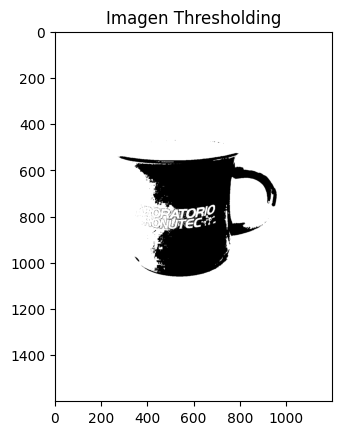

In [ ]:
#Función para aplicar thesholding en una imágen
def tresholding(imgoriginal, treshold, highervalue, lowervalue):

  #Transformar a escala de grises
  img_tresh = cv2.cvtColor(imgoriginal, cv2.COLOR_BGR2GRAY)

  #Altura y ancho iguales a la forma
  height, width = img_tresh.shape

  #Se cambian los valores de intensidad dependiendo de su valor
  for y in range(height):
    for x in range(width):
      if img_tresh[y,x] > treshold:
        img_tresh[y,x] = highervalue
      else:
        img_tresh[y,x] = lowervalue

  return img_tresh

#Se aplica la función de thresholding y se visualiza el resultado
img_tresh = tresholding(img_normal, 100, 255, 1)
plt.imshow(img_tresh, cmap = "gray")
plt.title('Imagen Thresholding')
plt.show()


In [ ]:
#Se aplica thresholding sobre todas las imágenes
tresh_img_list_bgr = [cv2.cvtColor(tresholding(img_color_list[i], 100, 255, 1), cv2.COLOR_GRAY2BGR) for i in range(len(img_color_list))]

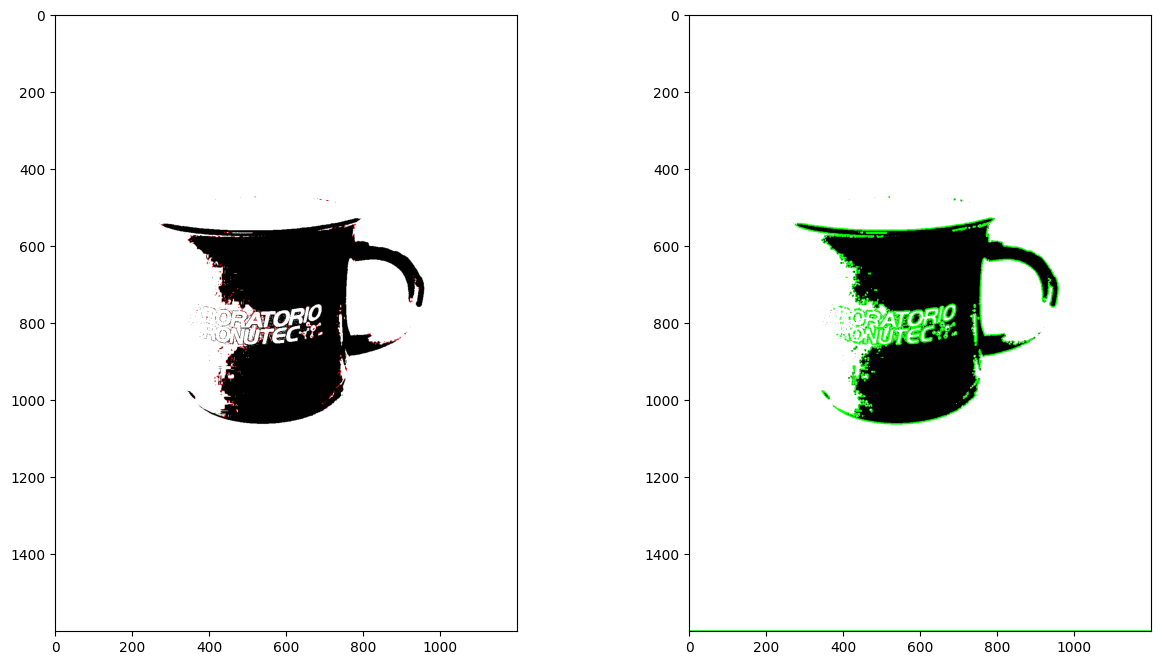

In [ ]:
#Se prueba un valor diferente de k en la imágen normal
plt.figure(figsize=(15,8))
img_corners, img_edges = analisis(tresh_img_list_bgr[0], 3, 500, 0.15) #Trying a higher k value, Increasing sigma

plt.subplot(1, 2, 1)
plt.imshow(img_corners, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(img_edges, cmap="gray")

plt.show()

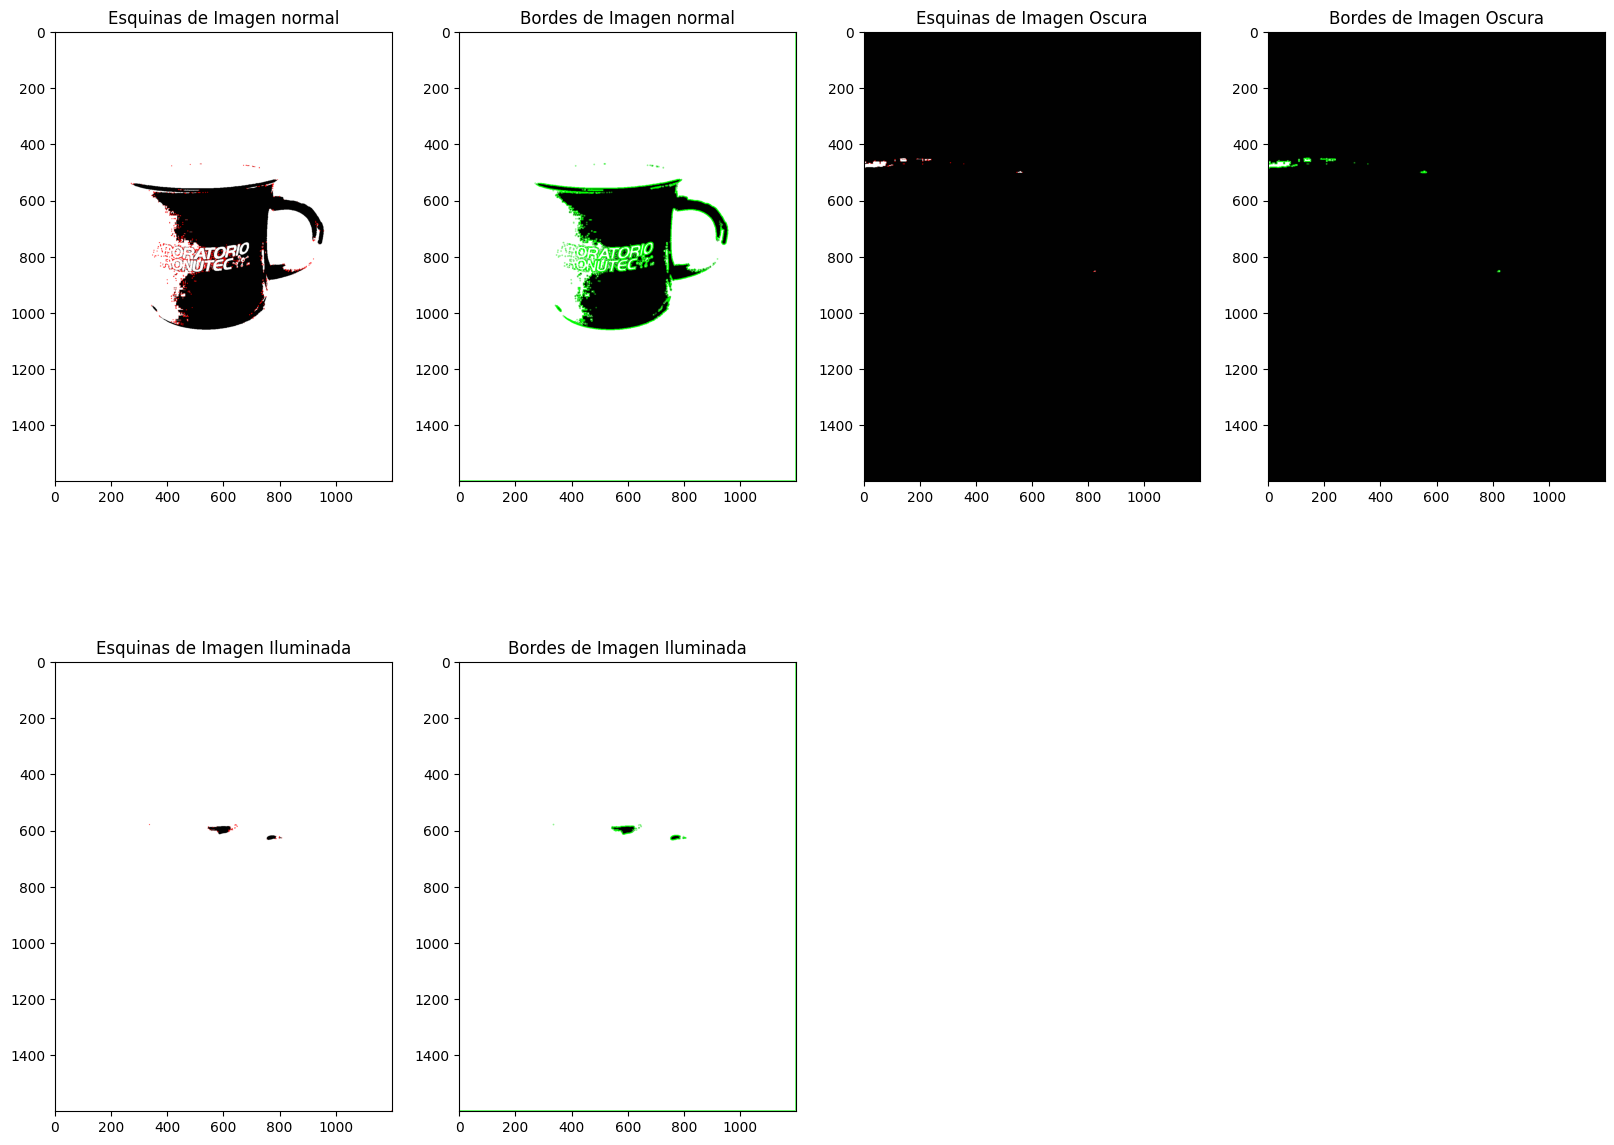

In [ ]:
#Se aplica el algoritmo en todas las imágenes
plt.figure(figsize=(20,15))
contador = 0

for i in range(len(tresh_img_list_bgr)):
  img_corners, img_edges = analisis(tresh_img_list_bgr[i], 3, 200, 0.15)


  j = i + 1 + contador
  k = i + 2 + contador

  contador += 1

  plt.subplot(2, 4, j)
  plt.imshow(img_corners, cmap="gray")
  plt.title('Esquinas de '+titulos[i])

  plt.subplot(2, 4, k)
  plt.imshow(img_edges, cmap="gray")
  plt.title('Bordes de '+titulos[i])

El resultado muestra que la detección de bordes y esquinas en una imagen binaria es más simple debido a los cambios repentinos de intensidad entre las zonas, maximizando los valores de las derivadas en ambas direcciones. Sin embargo, se observa que se pierde mucha información en las imágenes con diferente nivel de luz posterior al aplicar thresholding. Lo anterior podría mejorar significativamente si se empleara un valor límite de intensidad distinto entre ellas, para poder filtrar la información de forma más precisa

Para apreciar mejor como el factor `k` afecta el algoritmo de Harris, decidimos implementar un mosaico barriendo `k` para algunos valores representativos. El resultado se puede apreciar en la siguiente celda.

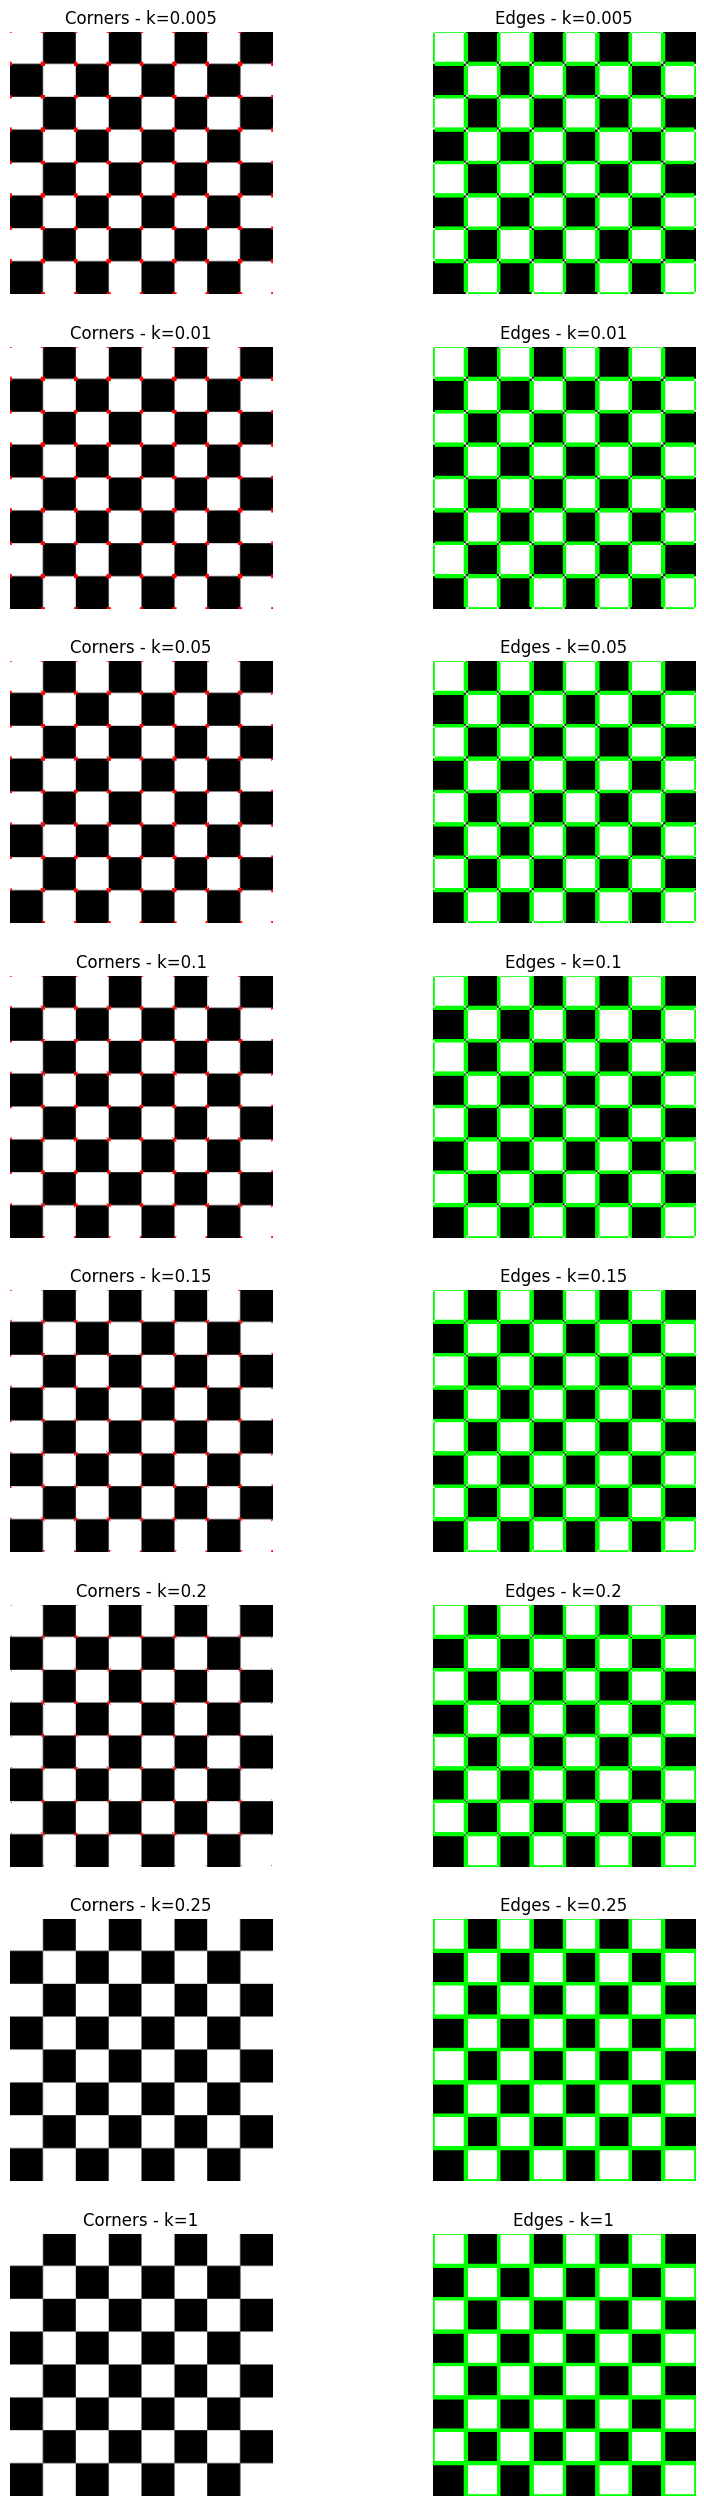

In [ ]:

image_path = download_image(CHESSBOARD)
#From: https://stackoverflow.com/questions/72456644/what-is-the-meaning-of-flag-in-cv2-imdecode:
#1 specifies cv2.IMREAD_COLOR : Reads image in BGR color format and removes the alpha channel .It is the default value of flag.
#0 specifies cv2.IMREAD_GRAYSCALE : Reads image in grayscale.
#-1 specifies cv2.IMREAD_UNCHANGED : Reads image without change, preserves the alpha channel
img = cv2.imread(image_path)
img_orig_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_orig_color = cv2.resize(img_orig_color, (300,300))

img_orig = cv2.cvtColor(io.imread(CHESSBOARD), cv2.COLOR_BGR2GRAY)
img_normal = cv2.resize(img_orig, (300,300))

ks = [0.005,0.01, 0.05, 0.1, 0.15, 0.2, 0.25,1]

#plt.figure(figsize=(len(ks)*6, 12))
fig,ax = plt.subplots(len(ks), 2)
fig.set_figwidth(10)
fig.set_figheight(len(ks)*4)

for i, k in enumerate(ks):
  #Se aplica la función previamente definida y se obtienen los valore Ixx, Ixy e
  #Iyy valores definidos de tamaño y sigma en el filtro Gaussiano
  matrix = gradient_gaussian(img_normal, 3, 1)

  #El Determinante se puede calcular por medio de los elementos resultantes de la
  #función anterior
  #detA = Ixx * Iyy - Ixy ** 2
  detA = matrix[0] * matrix[2] - matrix[1]**2

  #De igual forma la traza
  #traceA = Ixx + Iyy
  traceA = matrix[0] + matrix[2]

  #Por útlimo se calcula la respuesta de Harris
  harris_response = detA - k * traceA ** 2

  #Se crean copias de la imagen para realizar las operaciones
  img_copy_for_corners = np.copy(img_orig_color)
  img_copy_for_edges = np.copy(img_orig_color)

  #Se clasifican bordes y esquinas dependiendo del valor de R en cada punto
  for rowindex, response in enumerate(harris_response):
      for colindex, r in enumerate(response):
          if r > 0:
              # Esquina, se convierte el pixel a rojo
              img_copy_for_corners[rowindex, colindex] = [255,0,0]
          elif r < 0:
              # Borde, se convierte el pixel a verde
              img_copy_for_edges[rowindex, colindex] = [0,255,0]

  #Desplegamos los resultados

  plt.subplot(len(ks), 2, (i*2) + 1)
  plt.axis('off')
  plt.imshow(img_copy_for_corners), plt.title(f"Corners - k={k}",size=12)
  plt.subplot(len(ks), 2, (i*2) + 2)
  plt.axis('off')
  plt.imshow(img_copy_for_edges), plt.title(f"Edges - k={k}",size=12)

plt.show()

# **BIBLIOGRAFIA**

Gonzalez, R., y Woods, R. (2018). *Digital Image Processing*. 4th Edition Pearson.

Ochoa, G. (Febrero de 2024). *Detección de puntos de interés*. Presentación de Power Point, Maestría en Inteligencia Artificial Aplicada, ITESM.

Ochoa, G. (Febrero de 2024). *Extracción de descriptores*. Presentación de Power Point, Maestría en Inteligencia Artificial Aplicada, ITESM.

